# Preprocessing Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('auto-mpg.csv')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In the data set we have mpg variable as dependent and cylinders, displacement, horsepower, weight, acceleration, model year, and origin as independent. We discard car name for this analysis. Origin variable is categorical, therefore we will use dummy variable origin.

Origin variable contains 1 for domestic cars, 2 for european cars, and 3 for asian cars. It means this variable is categorical. Since 2 is greater than 1 and 3 is greater than 2, the equation in the model will think that asian cars have higher value than european cars, and european cars have higher value than domestic cars, which is not he case. These are just the origin places of the car, and there is no relational order among them. To prevent this we will use dummy variables and instead of one origin column we will have three different columns

In [7]:
import patsy
new_origin=patsy.dmatrix('C(origin)-1', data, return_type='dataframe')

In [8]:
data.drop('car name', axis=1, inplace=True)

In [9]:
data.drop('origin', axis=1, inplace=True)

In [10]:
data['Domestic cars']=new_origin.loc[:,'C(origin)[1]']

In [11]:
data['European cars']=new_origin.loc[:,'C(origin)[2]']

In [6]:
data['Asian cars']=new_origin.loc[:,'C(origin)[3]']

NameError: name 'new_origin' is not defined

In [8]:
origin = pd.get_dummies(data['origin'], drop_first= True)

In [9]:
data= pd.concat([data, origin], axis=1 )

In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,2,3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.0,0.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.0,0.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.0,0.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.0,0.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
2               398 non-null float64
3               398 non-null float64
dtypes: float64(5), int64(4), object(2)
memory usage: 34.3+ KB


Let's drop origin and car name

In [13]:
data.drop('origin', axis=1, inplace=True)

In [14]:
data.drop('car name', axis=1, inplace=True)

In [15]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,2,3
0,18.0,8,307.0,130,3504,12.0,70,0.0,0.0
1,15.0,8,350.0,165,3693,11.5,70,0.0,0.0
2,18.0,8,318.0,150,3436,11.0,70,0.0,0.0
3,16.0,8,304.0,150,3433,12.0,70,0.0,0.0
4,17.0,8,302.0,140,3449,10.5,70,0.0,0.0


Before starting analysis, I will **split data as train and test sets, in order to prevent contamination.** 

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
data_train, data_test = train_test_split(data,test_size=0.3)

In [18]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 295 to 287
Data columns (total 9 columns):
mpg             120 non-null float64
cylinders       120 non-null int64
displacement    120 non-null float64
horsepower      120 non-null object
weight          120 non-null int64
acceleration    120 non-null float64
model year      120 non-null int64
2               120 non-null float64
3               120 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 9.4+ KB


One interesting thing in the data set is type of horsepower variable. Eventhough it seems as integer in the head function its type is object in info.

Something wrong here !!!

When I take a close look the horsepower column, I noticed that there are some '?' for some values. Therefore, horsepower type is object.

One and easiest way to handle this problem is, discard the missing data rows. However, when we do this, we will discard some data, which are could be important for our analysis. That's why I will find those '?', and fill them with mean of horsepower column.

In [19]:
data_train['horsepower'] = pd.to_numeric(data_train['horsepower'], errors='coerce')

C:\Users\yrmsy\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Now let's fill those with mean of horsepower. For this step, I have to convert data thype fom object to numeric.

In [22]:
data_train['horsepower'].fillna(value=data_train['horsepower'].mean(),inplace=True)

In [21]:
data_train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,2,3
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,23.288849,5.492806,195.557554,104.516484,2979.079137,15.554317,75.827338,0.169065,0.197842
std,7.931761,1.717909,105.020173,38.273959,846.652892,2.776155,3.754041,0.375485,0.399091
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,76.000000,2226.500000,14.000000,73.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2860.000000,15.500000,76.000000,0.000000,0.000000
75%,29.000000,8.000000,302.000000,129.750000,3596.250000,17.200000,79.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,225.000000,4955.000000,24.800000,82.000000,1.000000,1.000000


Let's do same operations for test data

In [23]:
data_test['horsepower'] = pd.to_numeric(data_test['horsepower'], errors='coerce')

C:\Users\yrmsy\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
data_test['horsepower'].fillna(value=data_test.horsepower.mean(), inplace=True)

In [25]:
data_test.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,2,3
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,24.037500,5.366667,188.487500,104.361345,2950.375000,15.600000,76.433333,0.191667,0.200000
std,7.547464,1.664929,102.775546,38.185248,850.489044,2.725695,3.542618,0.395263,0.401677
min,10.000000,3.000000,71.000000,46.000000,1795.000000,9.000000,70.000000,0.000000,0.000000
25%,17.925000,4.000000,102.500000,75.000000,2222.250000,13.700000,73.000000,0.000000,0.000000
50%,23.700000,4.000000,145.000000,95.000000,2730.000000,15.500000,76.000000,0.000000,0.000000
75%,29.250000,6.000000,252.000000,117.000000,3656.250000,17.000000,79.000000,0.000000,0.000000
max,43.400000,8.000000,454.000000,230.000000,5140.000000,23.700000,82.000000,1.000000,1.000000


In order to prevent dummy trap I excluded Asian cars for my model

In [26]:
X_train = data_train.iloc[: , 1:9]
y_train = data_train.iloc[: , 0]

In [27]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,2,3
30,4,140.0,90.0,2264,15.5,71,0.0,0.0
313,4,151.0,90.0,2678,16.5,80,0.0,0.0
157,8,350.0,145.0,4440,14.0,75,0.0,0.0
355,4,107.0,75.0,2210,14.4,81,0.0,1.0
133,6,250.0,100.0,3781,17.0,74,0.0,0.0


In [28]:
X_test = data_test.iloc[: , 1:9]
y_test = data_test.iloc[: , 0]

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 295 to 287
Data columns (total 8 columns):
cylinders       120 non-null int64
displacement    120 non-null float64
horsepower      120 non-null float64
weight          120 non-null int64
acceleration    120 non-null float64
model year      120 non-null int64
2               120 non-null float64
3               120 non-null float64
dtypes: float64(5), int64(3)
memory usage: 8.4 KB


We just finish the preprocessing step. Now we can start Exploratory Data Analysis

# Explorratory Data Analysis

In [30]:
data_train.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,2,3
mpg,1.000000,-0.774391,-0.803694,-0.780023,-0.833056,0.427555,0.581264,0.242460,0.460190
cylinders,-0.774391,1.000000,0.952589,0.840698,0.897225,-0.496677,-0.357336,-0.347898,-0.427064
displacement,-0.803694,0.952589,1.000000,0.895904,0.931712,-0.542534,-0.383750,-0.369420,-0.458378
horsepower,-0.780023,0.840698,0.895904,1.000000,0.860650,-0.682860,-0.444459,-0.254278,-0.353431
weight,-0.833056,0.897225,0.931712,0.860650,1.000000,-0.413940,-0.308169,-0.306186,-0.470804
acceleration,0.427555,-0.496677,-0.542534,-0.682860,-0.413940,1.000000,0.372694,0.155317,0.132658
model year,0.581264,-0.357336,-0.383750,-0.444459,-0.308169,0.372694,1.000000,-0.020194,0.165051
2,0.242460,-0.347898,-0.369420,-0.254278,-0.306186,0.155317,-0.020194,1.000000,-0.224012
3,0.460190,-0.427064,-0.458378,-0.353431,-0.470804,0.132658,0.165051,-0.224012,1.000000


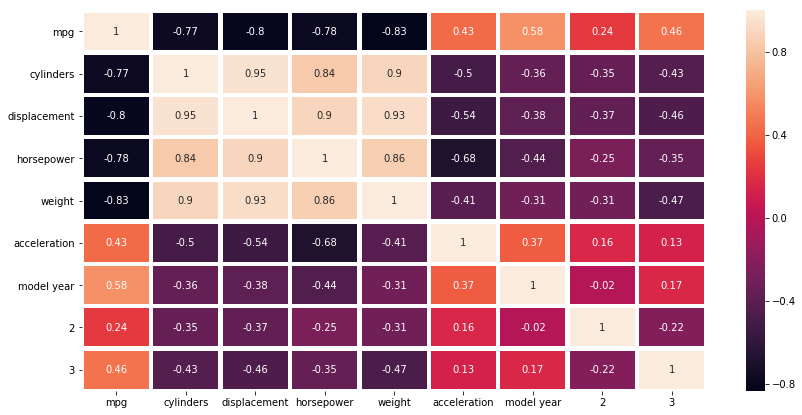

In [31]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(data_train.corr(), annot=True,linewidths=3.5, ax=ax)

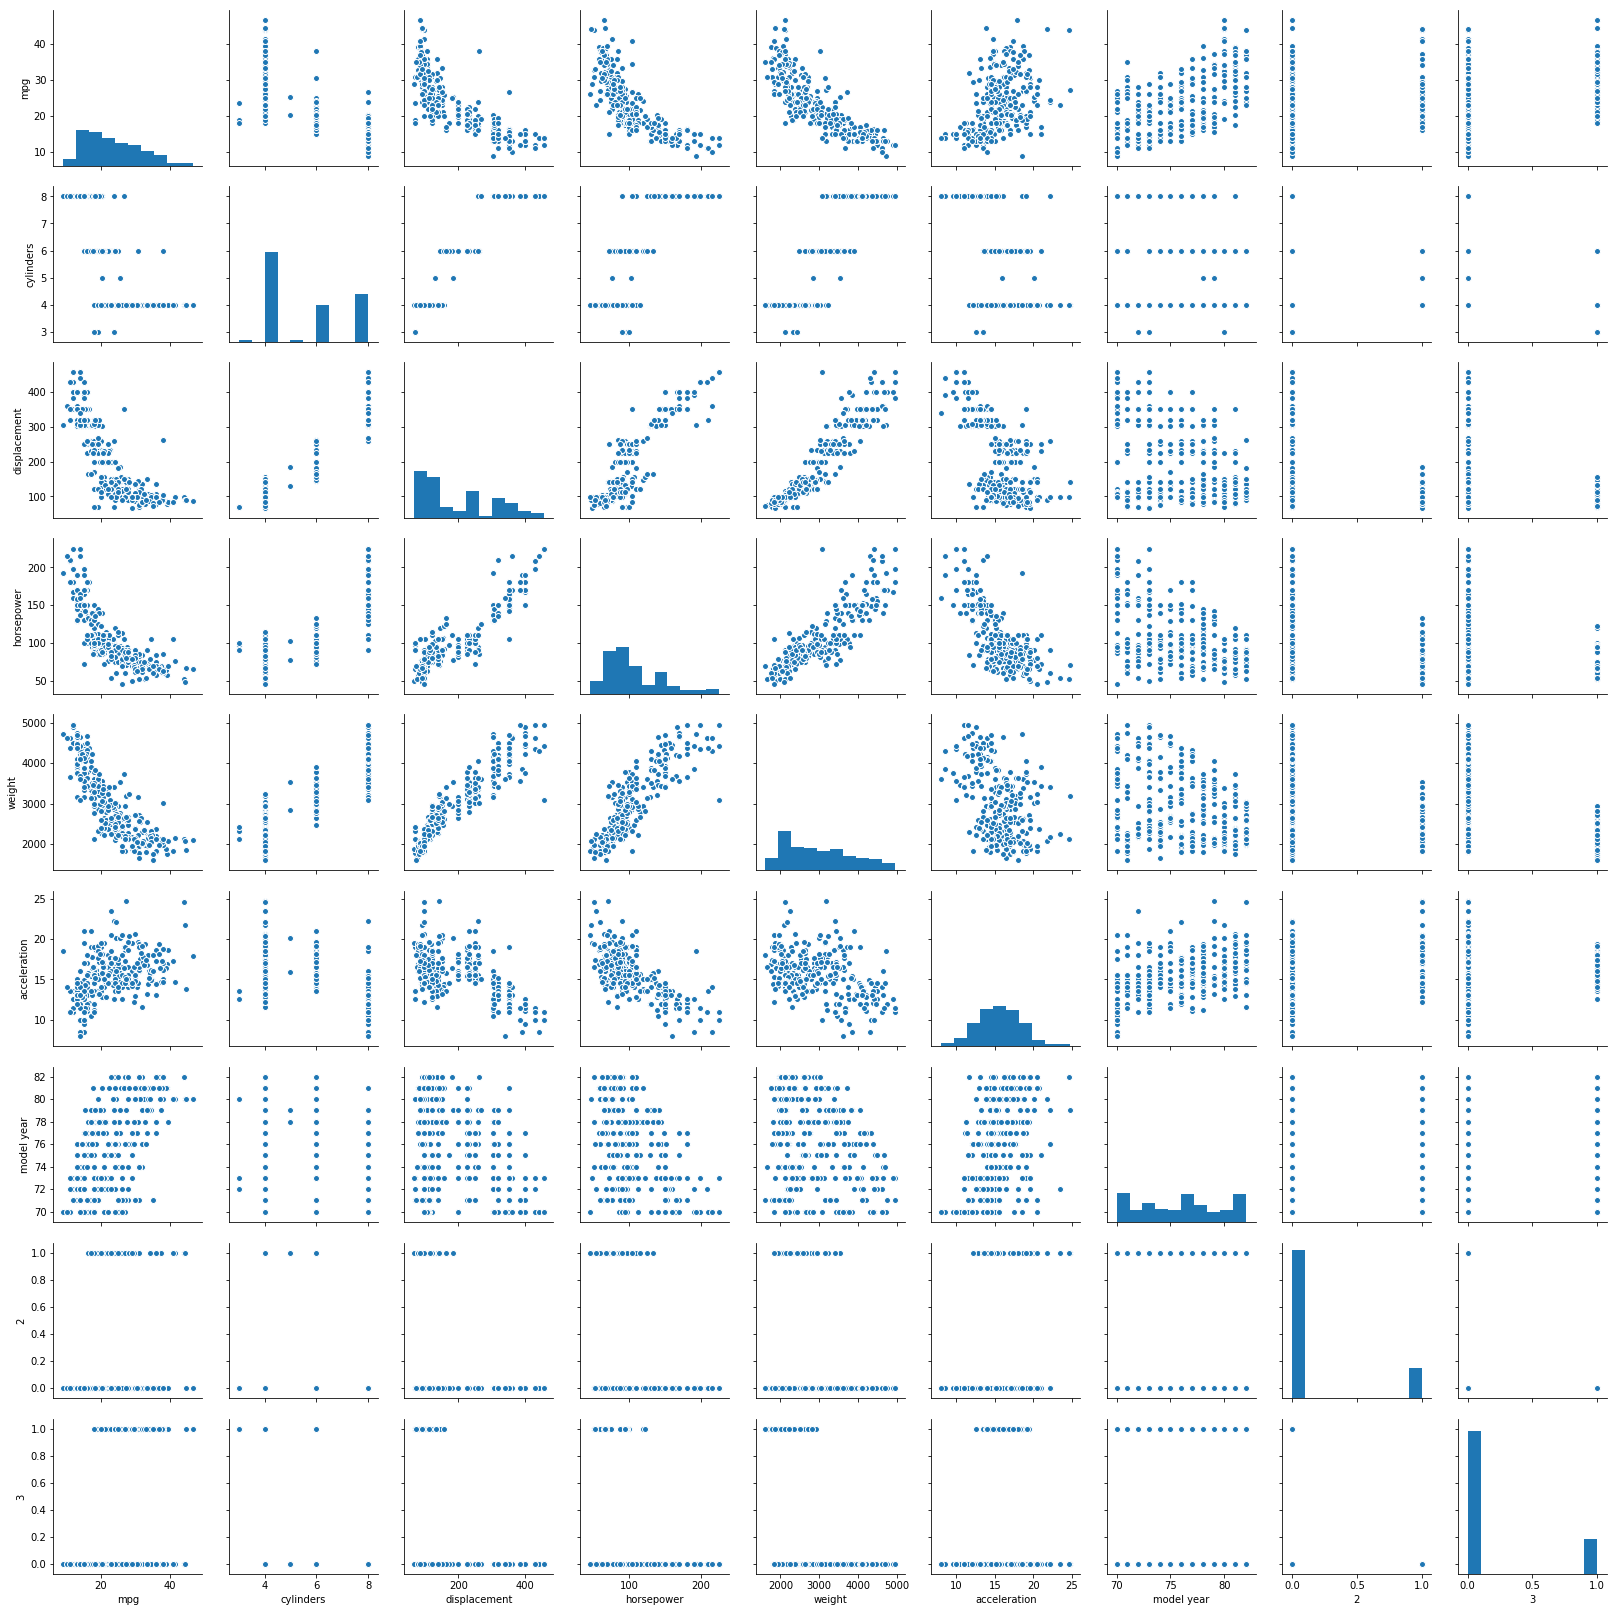

In [32]:
sns.pairplot(data_train)

As we see in that pair plot and heatmap plot of the correlation table, there is high correlation between mpg and cylinders, diplacement, horsepower and weight

Besides, again there is high correlation among cylinders, diplacement, horsepower and weight. We can use feature selection techniques here.

Before fitting linear model I want to rescale the features

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm= LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
lm_co=lm.coef_
lm_co

array([ -6.88684709e-01,   2.51727973e+00,  -8.80685538e-01,
        -5.81758993e+00,  -5.46191422e-03,   2.96511961e+00,
         9.28153673e-01,   1.17233578e+00])

In [38]:
lm.intercept_

23.288848920863302

In [39]:
predictions=lm.predict(X_test)
pred=lm.predict(X_train)

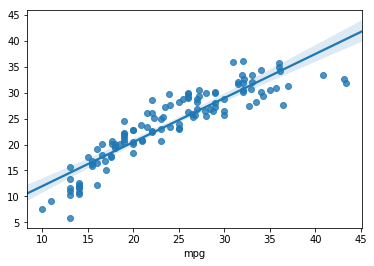

In [40]:
sns.regplot(x=y_test, y=predictions)

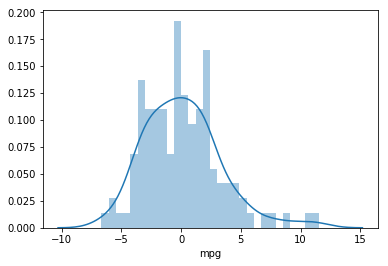

In [41]:
sns.distplot(y_test-predictions,bins=30)

In [42]:
from sklearn import metrics

In [43]:
metrics.explained_variance_score(y_test, predictions)

0.81927900741536652

In [44]:
import statsmodels.formula.api as sm

In [45]:
n=len(y_train)

In [46]:
XX_train=np.append(arr=np.ones((n,1)).astype(int), values=X_train, axis=1)
# I used XX_train because I need to add an extra column with all ones at the beginning of the traning set

In [47]:
X_opt=XX_train[:,[0,1,2,3,4,5,6,7,8]]
regressor_ols=sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     158.1
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           4.78e-97
Time:                        23:16:07   Log-Likelihood:                -727.66
No. Observations:                 278   AIC:                             1473.
Df Residuals:                     269   BIC:                             1506.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.2888      0.202    115.212      0.000        22.891    23.687
x1            -0.6887      0.674     -1.021      0.308        -2.016     0.639
x2             2.5173      0.984      2.558      0.011         0.580     4.455
x3            -0.8807      0.618     -1.426      0.155        -2.097     0.335
x4            -5.8176      0.655     -8.887      0.000        -7.106    -4.529
x5            -0.0055      0.319     -0.017      0.986        -0.633     0.622
x6             2.9651      0.234     12.680      0.000         2.505     3.426
x7             0.9282      0.263      3.530      0.000         0.411     1.446
x8             1.1723      0.273      4.299      0.000         0.635     1.709
==============================================================================
Omnibus:                       12.082   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.925
Skew:                           0.297   Prob(JB):                     0.000128
Kurtosis:                       4.093   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
data_train.columns

Index([         u'mpg',    u'cylinders', u'displacement',   u'horsepower',
             u'weight', u'acceleration',   u'model year',               2,
                     3],
      dtype='object')

When we look at the coefficients we see that, although 'displacement' variable has negative correlation with 'mpg', its coefficient is positive. This is because of multicolinearity !!!

Let's use backward elimination method for feature selection.

**Backward Elimination**

In [49]:
X_opt=XX_train[:,[0,1,2,3,4,6,7,8]]
regressor_ols=sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           3.42e-98
Time:                        23:18:12   Log-Likelihood:                -727.66
No. Observations:                 278   AIC:                             1471.
Df Residuals:                     270   BIC:                             1500.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.2888      0.202    115.426      0.000        22.892    23.686
x1            -0.6885      0.673     -1.023      0.307        -2.013     0.636
x2             2.5193      0.975      2.583      0.010         0.599     4.439
x3            -0.8746      0.506     -1.730      0.085        -1.870     0.121
x4            -5.8225      0.587     -9.927      0.000        -6.977    -4.668
x5             2.9651      0.233     12.705      0.000         2.506     3.425
x6             0.9281      0.262      3.537      0.000         0.411     1.445
x7             1.1724      0.272      4.308      0.000         0.637     1.708
==============================================================================
Omnibus:                       12.051   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.862
Skew:                           0.297   Prob(JB):                     0.000132
Kurtosis:                       4.091   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_opt=XX_train[:,[0,2,3,4,6,7,8]]
regressor_ols=sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 10 Jan 2018   Prob (F-statistic):           3.79e-99
Time:                        23:18:30   Log-Likelihood:                -728.20
No. Observations:                 278   AIC:                             1470.
Df Residuals:                     271   BIC:                             1496.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.2888      0.202    115.416      0.000        22.892    23.686
x1             1.8476      0.721      2.562      0.011         0.428     3.267
x2            -0.8060      0.501     -1.608      0.109        -1.792     0.181
x3            -5.8907      0.583    -10.108      0.000        -7.038    -4.743
x4             2.9668      0.233     12.711      0.000         2.507     3.426
x5             0.9104      0.262      3.476      0.001         0.395     1.426
x6             1.1465      0.271      4.231      0.000         0.613     1.680
==============================================================================
Omnibus:                       11.713   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.261
Skew:                           0.290   Prob(JB):                     0.000179
Kurtosis:                       4.074   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_opt=XX_train[:,[0,2,4,6,7,8]]
regressor_ols=sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     251.7
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          8.19e-100
Time:                        23:18:49   Log-Likelihood:                -729.52
No. Observations:                 278   AIC:                             1471.
Df Residuals:                     272   BIC:                             1493.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.2888      0.202    115.081      0.000        22.890    23.687
x1             1.2544      0.622      2.018      0.045         0.031     2.478
x2            -6.0916      0.571    -10.670      0.000        -7.216    -4.968
x3             3.0530      0.228     13.400      0.000         2.604     3.501
x4             0.8099      0.255      3.175      0.002         0.308     1.312
x5             1.0281      0.262      3.931      0.000         0.513     1.543
==============================================================================
Omnibus:                       12.562   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.795
Skew:                           0.266   Prob(JB):                     3.05e-05
Kurtosis:                       4.230   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_opt=XX_train[:,[0,4,6,7,8]]
regressor_ols=sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     310.2
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          3.28e-100
Time:                        23:19:11   Log-Likelihood:                -731.59
No. Observations:                 278   AIC:                             1473.
Df Residuals:                     273   BIC:                             1491.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.2888      0.204    114.439      0.000        22.888    23.689
x1            -5.0800      0.275    -18.491      0.000        -5.621    -4.539
x2             2.8985      0.216     13.432      0.000         2.474     3.323
x3             0.6275      0.240      2.616      0.009         0.155     1.100
x4             0.9140      0.257      3.559      0.000         0.408     1.420
==============================================================================
Omnibus:                       17.009   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.874
Skew:                           0.355   Prob(JB):                     3.26e-07
Kurtosis:                       4.441   Cond. No.                         2.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
data_train.columns

Index([         u'mpg',    u'cylinders', u'displacement',   u'horsepower',
             u'weight', u'acceleration',   u'model year',               2,
                     3],
      dtype='object')

After backward elimination we end up with 'weight', 'model year', '2' and '3'. When we have those variables, our R^2 is 0.82 and Adj R^2 is 0.817, whereas very first model R^2 is 0.825, Adj R^2 is 0.819, so there is not significant change. We can use last model instead of first and more complex one.

In [55]:
X_train2 = data_train[[ 'weight',  'model year', 2,3]]
X_test2 = data_test[[ 'weight', 'model year', 2, 3]]

In [56]:
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [57]:
lm.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
prediction2=lm.predict(X_test2)

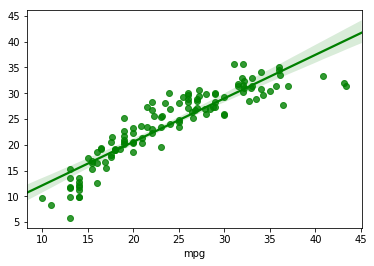

In [59]:
sns.regplot(x=y_test, y= prediction2, color='g')

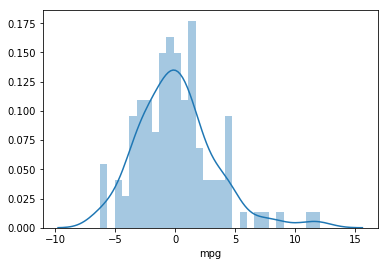

In [60]:
sns.distplot(y_test-prediction2,bins=30)

In [61]:
print 'MEA: ', metrics.mean_absolute_error(y_test,predictions)
print 'MSE: ', metrics.mean_squared_error(y_test, predictions)
print 'RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predictions))
print 'R^2: ',metrics.explained_variance_score(y_test, predictions)

MEA:  2.4546392216
MSE:  10.2244302618
RMSE : 3.19756630295
R^2:  0.819279007415


In [62]:
print 'MEA: ', metrics.mean_absolute_error(y_test,prediction2)
print 'MSE: ', metrics.mean_squared_error(y_test, prediction2)
print 'RMSE :', np.sqrt(metrics.mean_squared_error(y_test,prediction2))
print 'R^2: ',metrics.explained_variance_score(y_test, prediction2)

MEA:  2.39604276229
MSE:  10.4088943452
RMSE : 3.22628181429
R^2:  0.815811428945


In [15]:
metric = { 'MEA':[2.725, 2.624],
       'MSE':[11.478, 10.667],
       'RMSE':[3.388, 3.266],
       'R^2':[0.823, 0.836]}

In [16]:
df=pd.DataFrame(data=metric,index=('First Model', 'Second model'))
df

,MEA,MSE,RMSE,R^2
First Model,2.725,11.478,3.388,0.823
Second model,2.624,10.667,3.266,0.836


Text(0,0.5,u'R^2 and MSE')

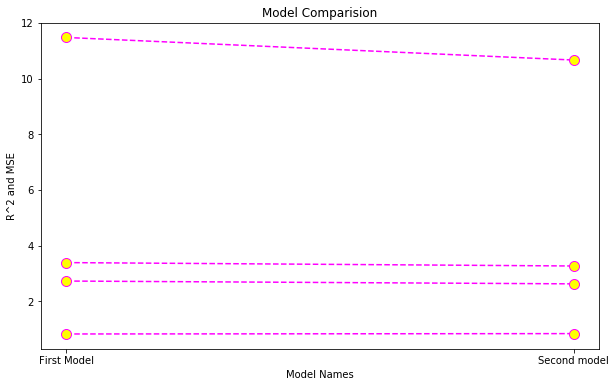

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df, color='magenta', linestyle='--', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Model Comparision')
plt.xlabel('Model Names')
plt.ylabel('R^2 and MSE')

As we see above R^2 increased and MSE decreased in second model

Let's use shrinkage methods to see quality of the model

**Shrinkage Methods**

**Ridge**

In [68]:
from sklearn.linear_model import Ridge

In [69]:
coef=['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', '2', '3']

In [70]:
rid=Ridge(alpha=0.5)

In [71]:
rid.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
rid_co=rid.coef_
rid_co

array([-0.63948522,  2.32364773, -0.88758957, -5.68967082, -0.02765082,
        2.94907759,  0.910292  ,  1.16187562])

In [73]:
rid.intercept_

23.288848920863302

In [74]:
pd.DataFrame(data=rid_co,index=coef,columns=['Coefficient'])

,Coefficient
cylinders,-0.639485
displacement,2.323648
horsepower,-0.887590
weight,-5.689671
acceleration,-0.027651
model year,2.949078
2,0.910292
3,1.161876


In [75]:
pred_rid=rid.predict(X_test)

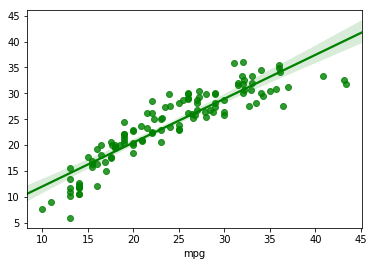

In [76]:
sns.regplot(x=y_test, y= pred_rid, color='g')

In [77]:
MSE_rid=metrics.mean_squared_error(y_test,pred_rid)
MSE_rid

10.224988710602195

In [78]:
R_rid=metrics.explained_variance_score(y_test, pred_rid)
R_rid

0.81926458923900847

**Lasso**

In [79]:
from sklearn.linear_model import Lasso

In [80]:
las=Lasso()

In [81]:
las.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
pred_las=las.predict(X_test)

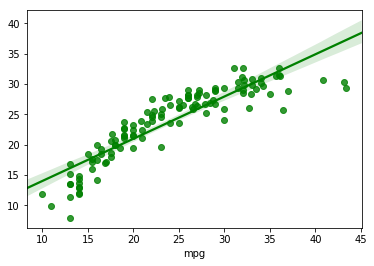

In [83]:
sns.regplot(x=y_test, y= pred_las, color='g')

In [84]:
MSE_las=metrics.mean_squared_error(y_test,pred_las)
MSE_las

12.176289935690077

In [85]:
R_las=metrics.explained_variance_score(y_test, pred_las)
R_rid

0.81926458923900847

**ElasticNet**

In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
el3=ElasticNet(alpha=0.3)
el3.fit(X_train,y_train)
pred_el3=el3.predict(X_test)

In [88]:
MSE_el3=metrics.mean_squared_error(y_test,pred_el3)
MSE_el3

11.131992591700449

In [89]:
R_el3=metrics.explained_variance_score(y_test, pred_el3)
R_el3

0.80346152847977226

In [90]:
el6=ElasticNet(alpha=0.6)
el6.fit(X_train,y_train)
pred_el6=el6.predict(X_test)

In [91]:
MSE_el6=metrics.mean_squared_error(y_test,pred_el6)
MSE_el6

12.219975164726062

In [92]:
R_el6=metrics.explained_variance_score(y_test, pred_el6)
R_el6

0.7846269004355737

In [93]:
el9=ElasticNet(alpha=0.9)
el9.fit(X_train,y_train)
pred_el9=el9.predict(X_test)

In [94]:
MSE_el9=metrics.mean_squared_error(y_test,pred_el9)
MSE_el9

13.3341536513551

In [95]:
R_el9=metrics.explained_variance_score(y_test, pred_el9)
R_el9

0.76535440010452227

In [4]:
metric = { 'MSE':[11.478, 10.667, 10.224, 12.176, 11.131, 12.219,13.334 ],
           'R^2':[0.823, 0.836, 0.819, 0.819, 0.803, 0.784, 0.765 ]}

In [5]:
df=pd.DataFrame(data=metric,index=('First Model', 'Second model', 'Ridge_reg', 'Lasso_reg', 'Elstk_net_0.3', 'Elstk_net_0.6', 'Elstk_net_0.9'))
df

,MSE,R^2
First Model,11.478,0.823
Second model,10.667,0.836
Ridge_reg,10.224,0.819
Lasso_reg,12.176,0.819
Elstk_net_0.3,11.131,0.803
Elstk_net_0.6,12.219,0.784
Elstk_net_0.9,13.334,0.765


Text(0,0.5,u'R^2 and MSE')

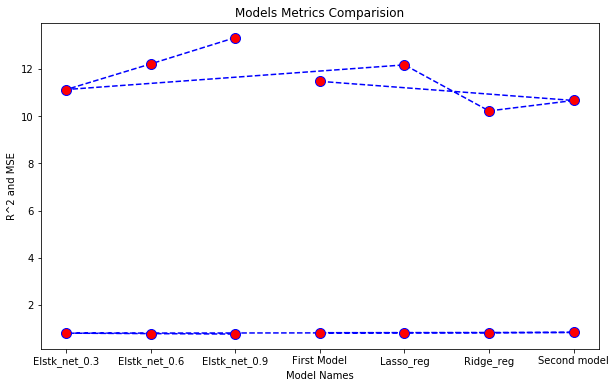

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Models'' Metrics Comparision')
plt.xlabel('Model Names')
plt.ylabel('R^2 and MSE')

When we look at the plot, we see that R^2 values are almost same, but Ridge method has the least MSE value. So we can say that for our model Ridge method doing well. 